In [219]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np 
import os

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [220]:
# Create a csv file for all data

files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv', index = False)

In [221]:
# Gather data

df_raw = pd.read_csv('all_data.csv')
df_raw.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## The questions about this dataset:
*** 

1) What were the best months of sales?

2) Which cities had the biggest sales volume?

3) Which is the best time to advertise?

4) Which products are most sold together?

5) Which product sold the most?

6) Is the Average Order Value increased over the year period?



## Cleaning the data
***

In [222]:
# Info about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [223]:
# Looking for duplicates
df_raw[df_raw.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN
186532,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [224]:
# Deleting duplicates
df_raw.drop_duplicates(inplace=True)

In [225]:
# Checking result
df_raw.duplicated().sum()

0

In [226]:
# Deleting row conteining string 'Order ID'
df_raw = df_raw[df_raw['Order ID'] != 'Order ID']

In [227]:
# Check for null values
df_raw.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [1]:
# Dropping null values
df_raw = df_raw.dropna(how='all')

NameError: name 'df_raw' is not defined

In [229]:
# Checking result
df_raw.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [230]:
# Converting columns 
df_raw['Quantity Ordered'] = pd.to_numeric(df_raw['Quantity Ordered'])
df_raw['Price Each'] = pd.to_numeric(df_raw['Price Each'])
df_raw['Order Date'] = pd.to_datetime(df_raw['Order Date'])

In [231]:
# Adding new columns
df_raw['Revenue'] = df_raw['Quantity Ordered'] * df_raw['Price Each']
df_raw['Month'] = df_raw['Order Date'].dt.month
df_raw['Hour'] = df_raw['Order Date'].dt.hour

In [232]:
# Adding cities column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

df_raw['City'] = df_raw['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [233]:
# Checking result
df_raw.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,Month,Hour,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,0,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,7,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,18,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,15,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,Atlanta (GA)


In [234]:
# Sort dataframe by Order Date
df_raw = df_raw.sort_values(by=('Order Date'))

In [235]:
# Creating a copy of the dataframe
df = df_raw.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,Month,Hour,City
143792,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,1,3,New York City (NY)
144602,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,1,3,San Francisco (CA)
145955,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,1,4,New York City (NY)
146609,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,1,5,Dallas (TX)
145962,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,1,6,Atlanta (GA)


***
## **QUESTION 1**
What were the best months of sales?
***


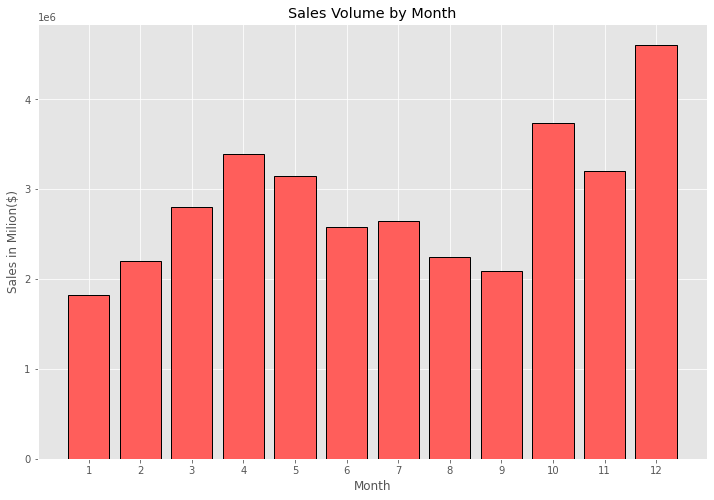

In [236]:
# Creating a barplot to display sales volume by month

month_revenue = df.groupby(['Month']).sum()['Revenue']
index_months = month_revenue.index

plt.bar(index_months,month_revenue,color='#FF5E5B',edgecolor='black',linewidth=1)
plt.xticks(index_months)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Month')
plt.title('Sales Volume by Month')
plt.show()

In [273]:
# Creating a dataframe with sales volume by month
df_month_sales = pd.DataFrame(data=month_revenue)
df_month_sales

,Revenue
Month,
1,1.821413e+06
2,2.200078e+06
3,2.804973e+06
4,3.389218e+06
5,3.150616e+06
6,2.576280e+06
7,2.646461e+06
8,2.241083e+06
9,2.094466e+06


### Answer for question 1

The best month of sales was December with a sales volume of $ 4.6  million

***
## **QUESTION 2**
Which cities had the biggest sales volume?
***


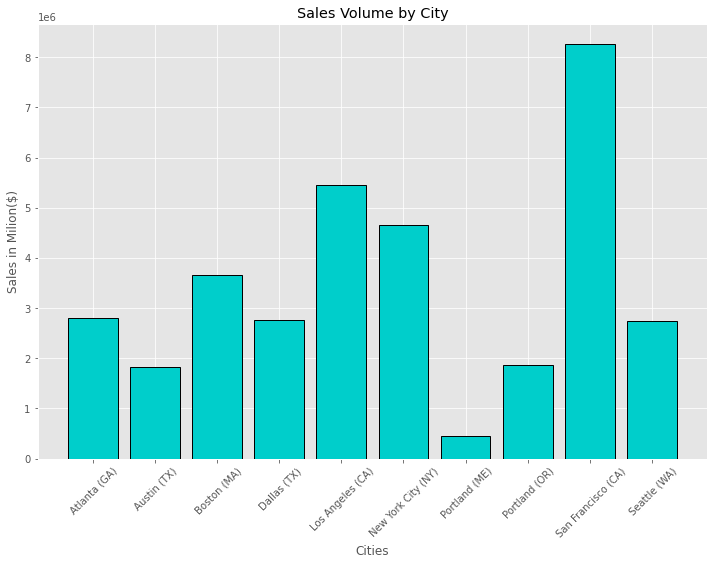

In [238]:
# Creating a barplot to display sales volume by cities

cities_revenue = df.groupby(['City']).sum()['Revenue']
index_cities = cities_revenue.index

plt.bar(index_cities,cities_revenue,color='#00CECB',edgecolor='black',linewidth=1)
plt.xticks(index_cities,rotation = '45', size = 10)
plt.ylabel('Sales in Milion($)')
plt.xlabel('Cities')
plt.title('Sales Volume by City')
plt.show()

In [239]:
# Creating a dataframe with sales volume by month
df_cities_sales = pd.DataFrame(data=cities_revenue)
df_cities_sales

,Revenue
City,
Atlanta (GA),2.794199e+06
Austin (TX),1.818044e+06
Boston (MA),3.658628e+06
Dallas (TX),2.765374e+06
Los Angeles (CA),5.448304e+06
New York City (NY),4.661867e+06
Portland (ME),4.493214e+05
Portland (OR),1.870011e+06
San Francisco (CA),8.254744e+06


### Answer for question 2

The city with the highest sales volume is San Francisco (CA) with $ 8.3 million in sales

***
## **QUESTION 3**
Which is the best time to advertise?
***


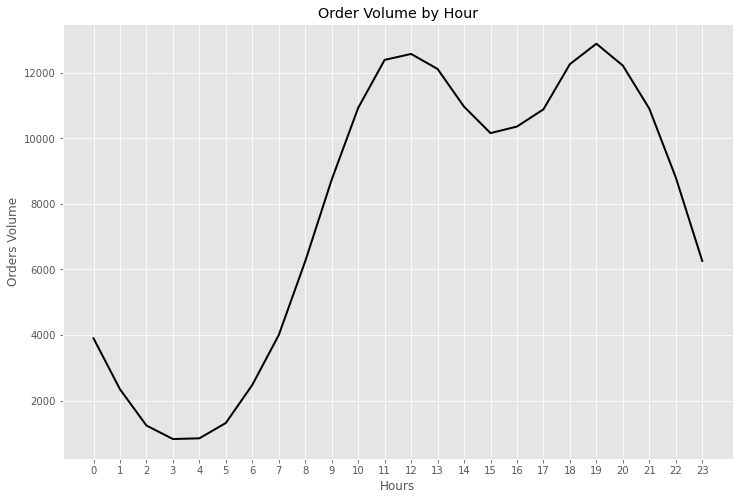

In [272]:
# Creating a line chart to display sales volume by hour
sales_hourly = df.groupby(['Hour']).count()['Revenue']
index_hour = sales_hourly.index

plt.plot(index_hour,sales_hourly,color='black',lw=2)
plt.xticks(index_hour)
plt.ylabel('Orders Volume')
plt.xlabel('Hours')
plt.title('Order Volume by Hour')
plt.show()

### Answer for question 3

As we can see from the plot above, sales volumes peaks are around 11 am and 7 pm. I suggest focusing marketing campaigns around these hours.

***
## **QUESTION 4**
Which products are most sold together?
***


In [265]:
# Merging products from same order ID
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_dup = df_dup[['Order ID','Grouped']].drop_duplicates()
df_dup.head()

<ipython-input-265-ad500f838112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
141212,144804,"Wired Headphones, iPhone"
144638,148074,"USB-C Charging Cable, Google Phone"
145025,148450,"Lightning Charging Cable, iPhone"
141078,144679,"USB-C Charging Cable, Google Phone"
143986,147451,"Wired Headphones, Google Phone"


In [271]:
# Count combinations
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', ' Lightning Charging Cable') 500
('Google Phone', ' USB-C Charging Cable') 476
('USB-C Charging Cable', ' Google Phone') 472
('Lightning Charging Cable', ' iPhone') 468
('iPhone', ' Wired Headphones') 225
('Wired Headphones', ' iPhone') 215
('Wired Headphones', ' Google Phone') 214
('Vareebadd Phone', ' USB-C Charging Cable') 189
('iPhone', ' Apple Airpods Headphones') 188
('Google Phone', ' Wired Headphones') 175


### Answer for question 4

iPhone and Lightning Charging Cable are the products that sold together the most

***
## **QUESTION 5**
Which product sold the most?
***


<ipython-input-245-d549763a46ab>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(index_product,rotation='vertical',size=12)


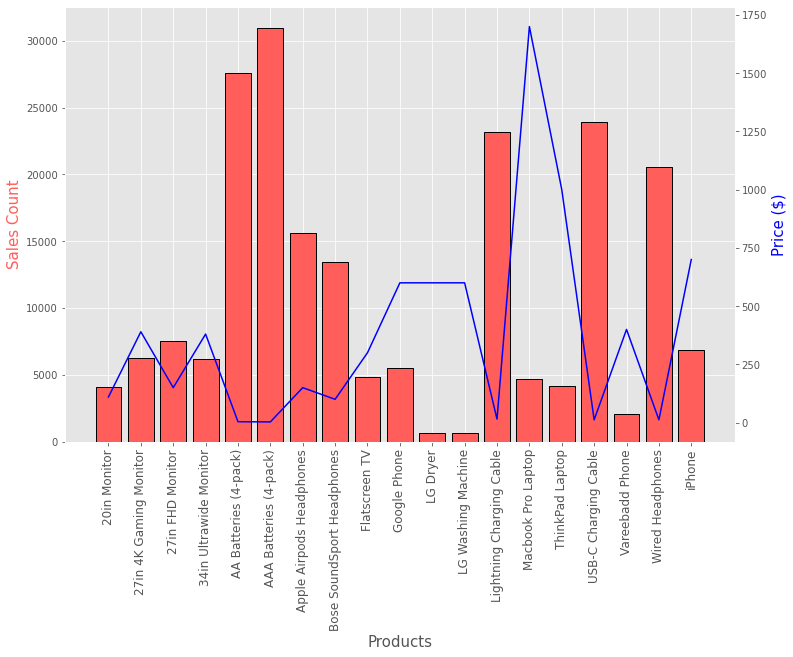

In [245]:
# Creating a barplot to display the sales volume for each product
product_sales = df.groupby(['Product']).sum()['Quantity Ordered']
prices = df.groupby(['Product']).mean()['Price Each']
index_product = product_sales.index

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(index_product,product_sales,color='#FF5E5B',edgecolor='black',linewidth=1)
ax2.plot(index_product,prices, color='b')

ax1.set_ylabel('Sales Count', color='#FF5E5B', size=15)
ax1.set_xlabel('Products',size=15)
ax2.set_ylabel('Price ($)',color='b',size=15)
ax1.set_xticklabels(index_product,rotation='vertical',size=12)
ax2.grid(b=None)
plt.show()

### Answer for question 5

AA and AAA batteries are the products that sold the most.

***
## **QUESTION 6**
Is the Average Order Value increased over the year period?
***


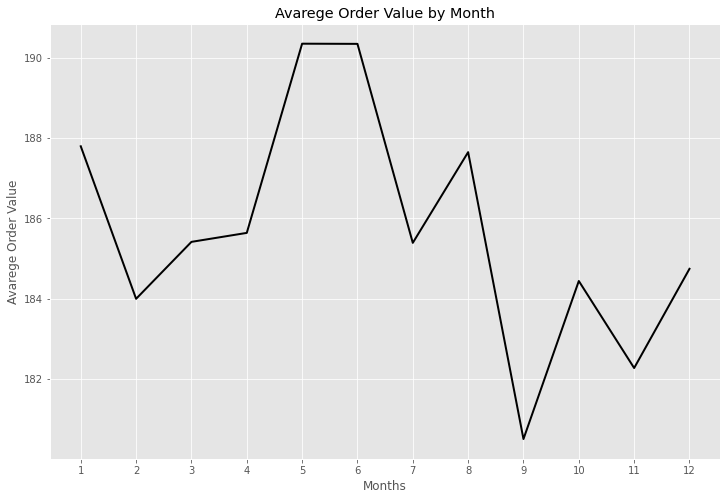

In [185]:
# Creating a line chart to display the average order value over the year period
AOV_months = df.groupby('Month').mean()['Revenue']
months_index = AOV_months.index

plt.plot(months_index,AOV_months,color='black',lw=2)
plt.xticks(months_index)
plt.ylabel('Avarege Order Value')
plt.xlabel('Months')
plt.title('Avarege Order Value by Month')
plt.show()

### Answer for question 6

As we can see from the above plot, the average order value hasn't increased over the year period. This is definitely a thing to improve.

***
## Conclusion

- The best quarter for sales was Q4 and particularly the best month of sales was December with a sales volume of 4.6 million dollar
- Sales volume peaks are around 11 am and 7 pm
- The city with the most sales was San Francisco (CA) with 8.3 million dollar in sales. On the other hand, the city with fewer sales was Portland (ME) with 450.000 dollar in sales
- The products that are most sold together are: iPhone and Lightning Charging Cable
- The bestsellers are: AA and AAA batteries
- The Average Order Value hasn't increased over the year period


## Suggestion

- Focus marketing campaigns around the peaks hours where customers are more active
- Testing new bundle offers to try to increase AOV